In [12]:
import datetime

import pandas as pd
import numpy as np
import sklearn 
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [13]:
#read in
feature_names = ['Health_Status', 'Unhealthy_Days', 'Birth_Defects','Obesity','High_Blood_Pres','Smoker','Diabetes']    

demographics = pd.read_csv("./data/DEMOGRAPHICS.csv" , usecols=['State_FIPS_Code'])
summary = pd.read_csv("./data/SUMMARYMEASURESOFHEALTH.csv", usecols=[ 'Health_Status', 'Unhealthy_Days'])
leading = pd.read_csv("./data/LEADINGCAUSESOFDEATH.csv", usecols=['A_Wh_BirthDef','A_Bl_BirthDef', 'A_Ot_BirthDef', 'A_Hi_BirthDef'])
measure = pd.read_csv("./data/MEASURESOFBIRTHANDDEATH.csv", usecols=['Premature','Under_18', 'Over_40', 'Infant_Mortality'])
vunerable  = pd.read_csv("./data/VUNERABLEPOPSANDENVHEALTH.csv", usecols=['Toxic_Chem', 'Carbon_Monoxide_Ind','Ozone_Ind', 'Particulate_Matter_Ind','Lead_Ind'])
risk = pd.read_csv("./data/RISKFACTORSANDACCESSTOCARE.csv", usecols=['Obesity','High_Blood_Pres','Smoker','Diabetes'])
summary.info()


leading['Birth_Defects'] = leading['A_Wh_BirthDef'] + leading['A_Bl_BirthDef'] + leading['A_Ot_BirthDef'] + leading['A_Hi_BirthDef'] + measure['Infant_Mortality']
leading.drop(['A_Wh_BirthDef','A_Bl_BirthDef', 'A_Ot_BirthDef', 'A_Hi_BirthDef'] , axis = 1, inplace= True)
measure.drop(['Infant_Mortality'] , axis = 1, inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 2 columns):
Health_Status     2477 non-null float64
Unhealthy_Days    2596 non-null float64
dtypes: float64(2)
memory usage: 49.2 KB


In [14]:
#merge
full = pd.concat([demographics, summary,leading, measure, vunerable,risk], axis=1, join="inner")

In [15]:
full.info()
full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 16 columns):
State_FIPS_Code           3141 non-null int64
Health_Status             2477 non-null float64
Unhealthy_Days            2596 non-null float64
Birth_Defects             19 non-null float64
Premature                 3141 non-null float64
Under_18                  3141 non-null float64
Over_40                   3141 non-null float64
Toxic_Chem                2388 non-null float64
Carbon_Monoxide_Ind       3141 non-null int64
Ozone_Ind                 3141 non-null int64
Particulate_Matter_Ind    3141 non-null int64
Lead_Ind                  3141 non-null int64
Obesity                   2224 non-null float64
High_Blood_Pres           1522 non-null float64
Smoker                    2267 non-null float64
Diabetes                  2719 non-null float64
dtypes: float64(11), int64(5)
memory usage: 392.7 KB


,State_FIPS_Code,Health_Status,Unhealthy_Days,Birth_Defects,Premature,Under_18,Over_40,Toxic_Chem,Carbon_Monoxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,Obesity,High_Blood_Pres,Smoker,Diabetes
count,3141.000000,2477.000000,2596.000000,19.000000,3141.00000,3141.000000,3141.000000,2.388000e+03,3141.000000,3141.000000,3141.000000,3141.000000,2224.000000,1522.000000,2267.000000,2719.000000
mean,30.304680,17.316754,6.106394,94.352632,11.81369,4.633206,1.675008,1.857627e+06,1.000318,1.066221,1.005412,1.000318,24.145189,26.480946,23.112880,7.810188
std,15.134423,6.088057,1.340792,10.263981,2.54333,2.377064,0.952848,1.169633e+07,0.017843,0.248708,0.073381,0.017843,4.904128,5.436607,5.733813,2.764576
min,1.000000,2.200000,2.200000,75.100000,0.10000,0.100000,0.100000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,4.200000,7.200000,3.600000,0.500000
25%,18.000000,12.900000,5.200000,85.500000,10.20000,2.900000,1.100000,1.702725e+04,1.000000,1.000000,1.000000,1.000000,21.100000,22.800000,19.400000,5.900000
50%,29.000000,16.400000,6.000000,95.500000,11.70000,4.300000,1.500000,1.614770e+05,1.000000,1.000000,1.000000,1.000000,24.300000,26.200000,23.000000,7.500000
75%,45.000000,20.900000,6.800000,101.350000,13.20000,6.000000,2.100000,9.748662e+05,1.000000,1.000000,1.000000,1.000000,27.200000,29.900000,26.700000,9.450000
max,56.000000,47.700000,12.600000,113.900000,23.50000,14.500000,9.100000,4.987494e+08,2.000000,2.000000,2.000000,2.000000,42.600000,47.100000,46.200000,20.800000


In [16]:
data = full
array = full.values
X = array[:,1:]
y = array[:,0]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(y)

[ 1.  1.  1. ... 56. 56. 56.]


In [17]:
tree_clf =  sklearn.linear_model.LinearRegression()
tree_clf.fit(X,y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

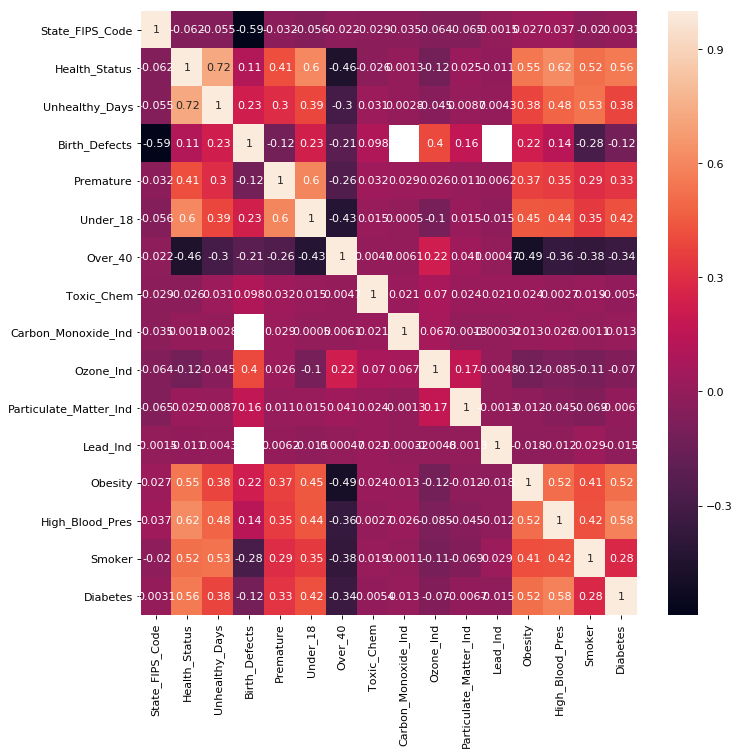

In [18]:
corr = data.corr()
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data.corr(), annot = True)

In [9]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

svc_model.fit(X_train, y_train)

In [10]:
y_predict = svc_model.predict(X_test)

NameError: name 'svc_model' is not defined

NameError: name 'svrs' is not defined

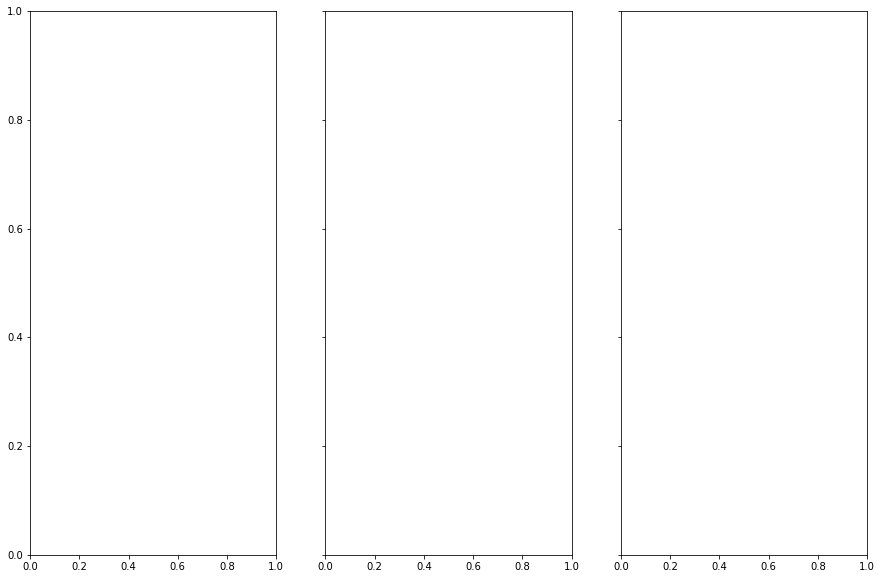

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)